# Load packages

In [98]:
import networkx as nx
import pandas as pd
import collections
import matplotlib.pyplot as plt

# Task A

In [75]:
# read file
df = pd.read_csv("../Data/harmonic_net_edgelist.csv")

# all nodes
nodes = df["source"] + df["target"]
nodes_distinct = nodes.unique()

# create a network graph
graph_songs = nx.Graph()

# add nodes to the network graph
graph_songs.add_nodes_from(nodes_distinct)

In [76]:
# prepare for the edges
df = df.drop(columns=["lsrp"])
edges = tuple(df.itertuples(index=False, name=None))

# create a list to store edges
list_tmp= []
for t in edges:
    list_tmp.append((t[0],t[1],t[2]))
# add edges to the network graph
graph_songs.add_weighted_edges_from(list_tmp)

## Task A.1
What are the characteristic properties of this song similarity network?
1. This network has 32223 nodes, 31703 edges, 31704 components

In [93]:
def graph_stat(graph):
    print("Num of nodes: {}".format(graph.number_of_nodes()))
    print("Num of edges {}".format(graph.number_of_edges()))
    print("Number of connected components {}".format(nx.number_connected_components(graph)))

    largest = max(nx.connected_components(graph), key=len)
    print("Number of nodes in the largest connected component: {}".format(len(largest)))

    component = graph.subgraph(largest)
    largest_component_diameter = nx.diameter(component)
    print("Diameter of the largest connected component: {}".format(largest_component_diameter))

    # Average (mean) degree of nodes
    degree_sequence = [d for n, d in graph.degree()]
    avg_degree = sum(degree_sequence) / len(degree_sequence)
    print("Average (mean) degree of nodes: {}".format(avg_degree))

    # Cluster coefficient
    cluster_coe = nx.algorithms.cluster.average_clustering(graph)
    print("Clustering coefficient: {}".format(cluster_coe))

    try:
        cycle = nx.find_cycle(graph)
        print("Graph contains cycles, e.g. %s" % str(cycle))
    except:
        print("Graph is a tree")


In [94]:
graph_stat(graph_songs)

Num of nodes: 32223
Num of edges 31703
Number of connected components 31704
Number of nodes in the largest connected component: 520
Diameter of the largest connected component: 5
Average (mean) degree of nodes: 1.9677249169847624
Clustering coefficient: 0.01135197560558961
Graph contains cycles, e.g. [('isophonics_0', 'isophonics_2'), ('isophonics_2', 'isophonics_5'), ('isophonics_5', 'isophonics_0')]


## Task A.2
How different is this network from a random network?

The graph has 32223 nodes and 31703 edges, so the potential number of edges is n(n-1)/ = 519144753. and the frequency by which edges occur is p = 31703/519144753 = 6.106774616674206e-05

In [85]:
num_nodes = 32223
num_edges = 31703
p = num_edges / (num_nodes*(num_nodes-1)/2) # p = 6.106774616674206e-05


In [87]:
# Generate a random graph
random_graph = nx.erdos_renyi_graph(n=num_nodes, p=p)

In [95]:
graph_stat(random_graph)

Num of nodes: 32223
Num of edges 31711
Number of connected components 5430
Number of nodes in the largest connected component: 25388


KeyboardInterrupt: 

In [96]:
# average degree
degree_sequence = [d for n, d in random_graph.degree()]
sum(degree_sequence)/len(degree_sequence)

1.9682214567234584

The average degree of the random graph is 1.9682214567234584, which is close to p(n-1)=1.9677249169847626. This also match average degree of real songs graph=1.9677249169847624 because the p is derived form this real graph.

In [90]:
import math
ln = math.log(num_nodes)/num_nodes
# p = 6.106774616674206e-05
# math.log(num_nodes)/num_nodes = 0.00032214367880911633
# p < math.log(num_nodes)/num_nodes, so this random graph has isolated nodes


0.00032214367880911633

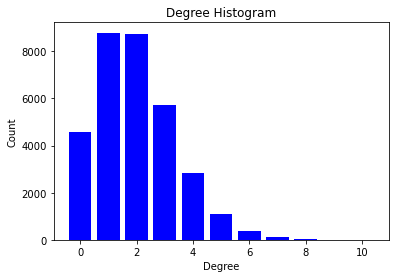

In [99]:
degree_count = collections.Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

fig, ax = plt.subplots()

plt.bar(deg, cnt, width=0.80, color="b")
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

Expected degree of random graph should be p(n-1)=